In [1]:
from  keras.preprocessing.image  import ImageDataGenerator, img_to_array, load_img 
from  keras.models  import Sequential
from  keras.layers  import Dropout,  Flatten,  Dense
from  keras.applications.vgg16 import VGG16 
from keras.optimizers import RMSprop
from  keras.utils.np_utils import to_categorical 
import time
import os
import numpy as np 
import math
import  matplotlib.pyplot  as  plt

img_width = 224
img_height = 224
batch_size = 64 
epochs = 500
nb_train = 4000
nb_validation = 1200
nb_test = 1200
nb_classes = 4

PATH_TO_FE = "VGG" 
train_dir  =  "balanced_dataset/train"
validation_dir = "balanced_dataset/validation" 
test_dir  =  "balanced_dataset/test" 


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.applications import ResNet50

model= ResNet50(weights='imagenet', 
                 include_top = False
                 )

In [3]:
#PREPROCESSING + FEATURE EXTRACTION

datagen  =  ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory( 
    train_dir,
    target_size = (img_width, img_height), 
    batch_size = batch_size,
    class_mode  =  None,  
    shuffle = False, 
    interpolation  =  'lanczos')

validation_generator = datagen.flow_from_directory( 
    validation_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None,
    shuffle=False, 
    interpolation  =  'lanczos')

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = None,
    shuffle=False, 
    interpolation  =  'lanczos')

###########Feature Extraction (FE)#########################
#Train
max_size_train = int(math.ceil(nb_train / batch_size)) 
train_features = model.predict_generator(train_generator, max_size_train)
np.save('VGG/ResNet50_FE_train_1.npy',  train_features)
#Validation
max_size_validation = int(math.ceil(nb_validation / batch_size)) 
validation_features  =  model.predict_generator(validation_generator,  max_size_validation) 
np.save('VGG/ResNet50_FE_validation_1.npy',  validation_features)
#Test
max_size_test = int(math.ceil(nb_test / batch_size)) 
test_features  =  model.predict_generator(test_generator,  max_size_test)

#Labels Extraction
train_labels  =  train_generator.classes  
train_labels = to_categorical(train_labels, num_classes=nb_classes) 
validation_labels  =  validation_generator.classes  
validation_labels  =  to_categorical(validation_labels,  num_classes=nb_classes) 
test_labels  =  test_generator.classes  
test_labels  =  to_categorical(test_labels,  num_classes=nb_classes) 

#Save Features
train_data = np.load('VGG/ResNet50_FE_train_1.npy') 
validation_data  =  np.load('VGG/ResNet50_FE_validation_1.npy')


Found 4000 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [4]:
#Top Model Classificator
model = Sequential() 
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256,  activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(nb_classes,  activation='softmax'))


In [5]:
#Compile models
model.compile(
    optimizer = RMSprop(lr=2e-5),
    loss='categorical_crossentropy',  
    metrics=['accuracy'])


In [6]:
#Train model
history = model.fit(
    train_data, 
    train_labels,
    epochs=epochs,  
    batch_size=batch_size, 
    validation_data=(validation_data, validation_labels))


Train on 4000 samples, validate on 1200 samples
Epoch 1/500
4000/4000 [==============================] - 1s 200us/step - loss: 1.6290 - acc: 0.2477 - val_loss: 1.3877 - val_acc: 0.2500
Epoch 2/500
4000/4000 [==============================] - 0s 54us/step - loss: 1.5613 - acc: 0.2522 - val_loss: 1.3856 - val_acc: 0.2500
Epoch 3/500
4000/4000 [==============================] - 0s 48us/step - loss: 1.5309 - acc: 0.2520 - val_loss: 1.3845 - val_acc: 0.2667
Epoch 4/500
4000/4000 [==============================] - 0s 49us/step - loss: 1.5042 - acc: 0.2495 - val_loss: 1.3846 - val_acc: 0.2492
Epoch 5/500
4000/4000 [==============================] - 0s 42us/step - loss: 1.4723 - acc: 0.2540 - val_loss: 1.3834 - val_acc: 0.2467
Epoch 6/500
4000/4000 [==============================] - 0s 41us/step - loss: 1.4587 - acc: 0.2605 - val_loss: 1.3832 - val_acc: 0.2317
Epoch 7/500
4000/4000 [==============================] - 0s 41us/step - loss: 1.4527 - acc: 0.2422 - val_loss: 1.3822 - val_acc: 0.3125

Epoch 120/500
4000/4000 [==============================] - 0s 40us/step - loss: 1.3286 - acc: 0.4183 - val_loss: 1.3244 - val_acc: 0.4458
Epoch 121/500
4000/4000 [==============================] - 0s 40us/step - loss: 1.3318 - acc: 0.4093 - val_loss: 1.3242 - val_acc: 0.4600
Epoch 122/500
4000/4000 [==============================] - 0s 40us/step - loss: 1.3288 - acc: 0.4198 - val_loss: 1.3228 - val_acc: 0.5000
Epoch 123/500
4000/4000 [==============================] - 0s 40us/step - loss: 1.3320 - acc: 0.4153 - val_loss: 1.3223 - val_acc: 0.4650
Epoch 124/500
4000/4000 [==============================] - 0s 40us/step - loss: 1.3297 - acc: 0.4222 - val_loss: 1.3218 - val_acc: 0.4700
Epoch 125/500
4000/4000 [==============================] - 0s 40us/step - loss: 1.3280 - acc: 0.4185 - val_loss: 1.3211 - val_acc: 0.4792
Epoch 126/500
4000/4000 [==============================] - 0s 41us/step - loss: 1.3266 - acc: 0.4240 - val_loss: 1.3209 - val_acc: 0.4575
Epoch 127/500
4000/4000 [=========

4000/4000 [==============================] - 0s 40us/step - loss: 1.2702 - acc: 0.4535 - val_loss: 1.2598 - val_acc: 0.5050
Epoch 239/500
4000/4000 [==============================] - 0s 40us/step - loss: 1.2701 - acc: 0.4525 - val_loss: 1.2579 - val_acc: 0.4942
Epoch 240/500
4000/4000 [==============================] - 0s 40us/step - loss: 1.2651 - acc: 0.4572 - val_loss: 1.2598 - val_acc: 0.4842
Epoch 241/500
4000/4000 [==============================] - 0s 41us/step - loss: 1.2683 - acc: 0.4567 - val_loss: 1.2562 - val_acc: 0.4992
Epoch 242/500
4000/4000 [==============================] - 0s 41us/step - loss: 1.2705 - acc: 0.4595 - val_loss: 1.2572 - val_acc: 0.5108
Epoch 243/500
4000/4000 [==============================] - 0s 41us/step - loss: 1.2696 - acc: 0.4570 - val_loss: 1.2560 - val_acc: 0.4958
Epoch 244/500
4000/4000 [==============================] - 0s 41us/step - loss: 1.2691 - acc: 0.4513 - val_loss: 1.2556 - val_acc: 0.5167
Epoch 245/500
4000/4000 [=======================

4000/4000 [==============================] - 0s 42us/step - loss: 1.2175 - acc: 0.4818 - val_loss: 1.2022 - val_acc: 0.5192
Epoch 357/500
4000/4000 [==============================] - 0s 52us/step - loss: 1.2154 - acc: 0.4813 - val_loss: 1.2013 - val_acc: 0.5108
Epoch 358/500
4000/4000 [==============================] - 0s 45us/step - loss: 1.2166 - acc: 0.4805 - val_loss: 1.2015 - val_acc: 0.5142
Epoch 359/500
4000/4000 [==============================] - 0s 41us/step - loss: 1.2205 - acc: 0.4740 - val_loss: 1.2001 - val_acc: 0.5117
Epoch 360/500
4000/4000 [==============================] - 0s 40us/step - loss: 1.2175 - acc: 0.4858 - val_loss: 1.1995 - val_acc: 0.5308
Epoch 361/500
4000/4000 [==============================] - 0s 45us/step - loss: 1.2144 - acc: 0.4910 - val_loss: 1.1993 - val_acc: 0.5233
Epoch 362/500
4000/4000 [==============================] - 0s 41us/step - loss: 1.2178 - acc: 0.4875 - val_loss: 1.1988 - val_acc: 0.5300
Epoch 363/500
4000/4000 [=======================

4000/4000 [==============================] - 0s 41us/step - loss: 1.1790 - acc: 0.5108 - val_loss: 1.1563 - val_acc: 0.5475
Epoch 475/500
4000/4000 [==============================] - 0s 40us/step - loss: 1.1770 - acc: 0.5127 - val_loss: 1.1562 - val_acc: 0.5400
Epoch 476/500
4000/4000 [==============================] - 0s 40us/step - loss: 1.1738 - acc: 0.5085 - val_loss: 1.1537 - val_acc: 0.5408
Epoch 477/500
4000/4000 [==============================] - 0s 40us/step - loss: 1.1757 - acc: 0.5007 - val_loss: 1.1534 - val_acc: 0.5567
Epoch 478/500
4000/4000 [==============================] - 0s 40us/step - loss: 1.1758 - acc: 0.5070 - val_loss: 1.1550 - val_acc: 0.5317
Epoch 479/500
4000/4000 [==============================] - 0s 40us/step - loss: 1.1788 - acc: 0.5040 - val_loss: 1.1533 - val_acc: 0.5258
Epoch 480/500
4000/4000 [==============================] - 0s 42us/step - loss: 1.1742 - acc: 0.5100 - val_loss: 1.1521 - val_acc: 0.5433
Epoch 481/500
4000/4000 [=======================

In [7]:
# h5py 
model.save_weights('VGG/ResNet50_FE_model_1.h5')


In [8]:
def print_graphics (history):
    #Mostramos otro tipo de grafico
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc)+ 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    #plt.tittle('Trainning and validation accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    #plt.tittle('Trainning and validation loss')
    plt.legend()

    plt.show()

In [9]:
def print_evaluate_model(model, history):
    #Evaluate model
    (loss, acc) = model.evaluate(
        test_features, test_labels, 
        batch_size=batch_size, 
        verbose=0)

    print("acc: {0:.2f}% - loss: {1:f}".format(acc * 100, loss))

In [10]:
print_evaluate_model(model, history)

acc: 45.83% - loss: 1.199027


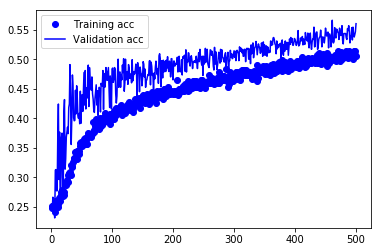

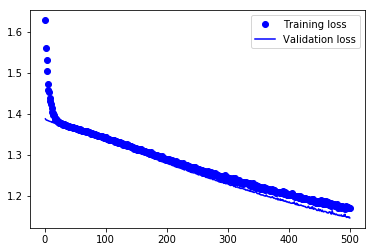

In [11]:
print_graphics (history)